In [3]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import yfinance as yf
import os

In [4]:
import pandas as pd

# Read the CSV file into a DataFrame and explicitly parse the 'timestamp' column as datetime objects

ltc = pd.read_csv('my_coins/Ltc-usd.csv')
# Display the first few rows of the DataFrame
print(ltc.head())


         Date     Open     High      Low    Close  Adj Close    Volume
0  2017-01-01  4.32912  4.52153  4.32871  4.51159    4.51159  11337500
1  2017-01-02  4.52045  4.73766  4.48466  4.64894    4.64894  14595300
2  2017-01-03  4.65588  4.73184  4.56487  4.62620    4.62620  10055700
3  2017-01-04  4.63375  4.83785  4.63375  4.83785    4.83785  13762400
4  2017-01-05  4.91437  4.94586  4.22687  4.29272    4.29272  19196000


In [11]:
def display_LTC_graph():
# Plot the price of BTC over the specified interval
    plt.figure(figsize=(10, 6))
    plt.plot(ltc['Date'], ltc['Close'], label='LTC Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('LTC Price Over Time')
    plt.legend()
    plt.grid(True)
    plt.show() 

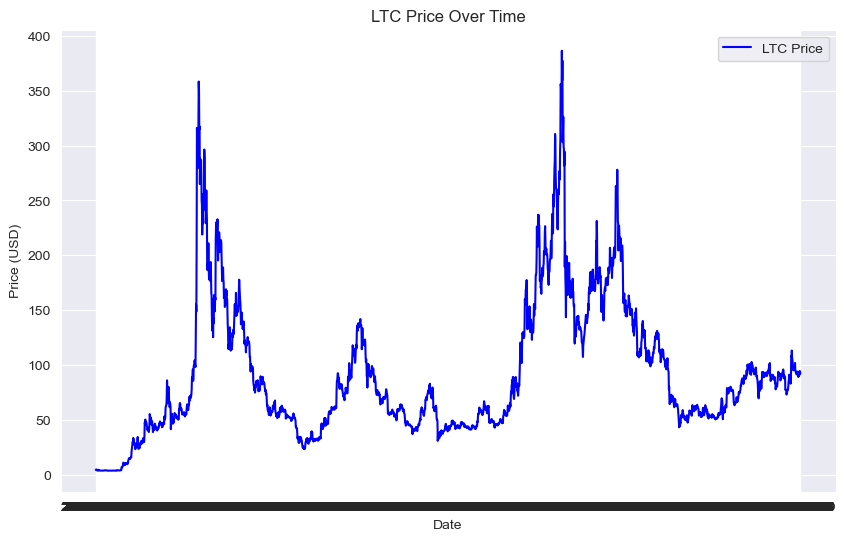

In [12]:
display_LTC_graph()

In [13]:
import pandas as pd
import yfinance as yf

def display_correlation():
    cryptocurrencies = ['ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'EOS-USD', 'ADA-USD', 'XLM-USD', 'XMR-USD', 'TRX-USD', 'LINK-USD', 'DOGE-USD']
    # Fetch historical market data for Bitcoin
    ltc = yf.download('LTC-USD', start='2017-01-01', end='2023-08-01')
    # Create a DataFrame to store the correlation coefficients
    correlation_data = pd.DataFrame(columns=['Cryptocurrency', 'Correlation'])
    # Calculate the correlation coefficient between Bitcoin and other cryptocurrencies
    for crypto in cryptocurrencies:
        crypto_data = yf.download(crypto, start='2017-01-01', end='2023-08-01')
        merged_data = pd.merge(ltc['Close'], crypto_data['Close'], on='Date')
        correlation = merged_data.corr().iloc[0, 1]
        correlation_data = correlation_data.append({'Cryptocurrency': crypto, 'Correlation': correlation}, ignore_index=True)
    # Sort the DataFrame by correlation coefficient (descending)
    correlation_data = correlation_data.sort_values(by='Correlation', ascending=False)
    # Select ten cryptocurrencies with positive correlation coefficients
    positive_correlated_cryptos = correlation_data.head(10)
    # Select ten cryptocurrencies with negative correlation coefficients
    negative_correlated_cryptos = correlation_data.tail(10)
    # Display the results
    print("Top 10 cryptocurrencies positively correlated with Bitcoin:")
    print(positive_correlated_cryptos)
    print("\nTop 10 cryptocurrencies negatively correlated with Bitcoin:")
    print(negative_correlated_cryptos)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


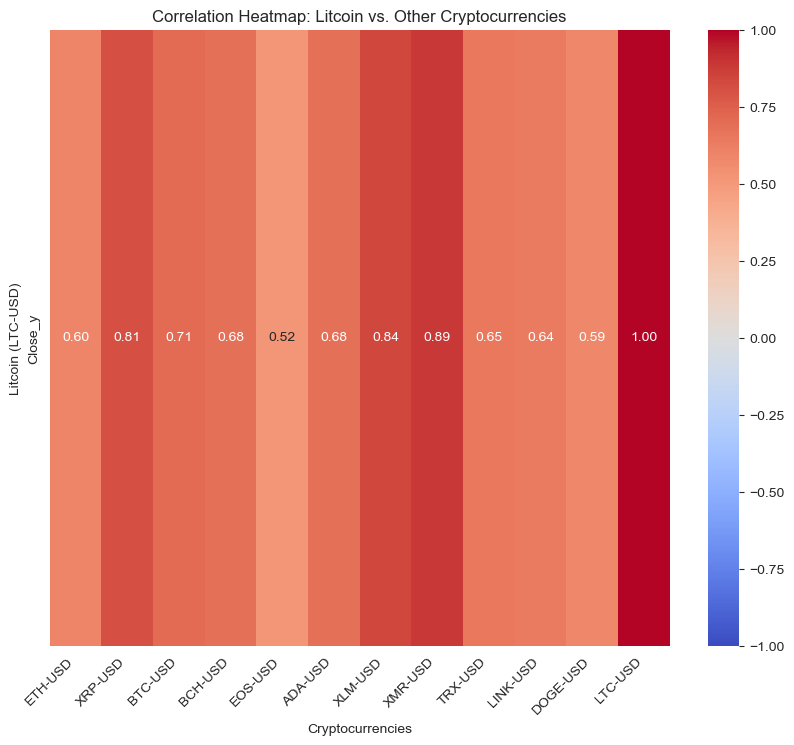

In [14]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap():
    
    cryptocurrencies = ['ETH-USD', 'XRP-USD', 'BTC-USD', 'BCH-USD', 'EOS-USD', 'ADA-USD', 'XLM-USD', 'XMR-USD', 'TRX-USD', 'LINK-USD', 'DOGE-USD']

    # Fetch historical market data for Bitcoin
    ltc = yf.download('LTC-USD', start='2017-01-01', end='2023-08-01')

    # Create a DataFrame to store the correlation coefficients
    correlation_data = pd.DataFrame()

    # Calculate the correlation coefficient between Bitcoin and other cryptocurrencies
    for crypto in cryptocurrencies:
        crypto_data = yf.download(crypto, start='2017-01-01', end='2023-08-01')
        merged_data = pd.merge(ltc['Close'], crypto_data['Close'], on='Date')
        correlation_data[crypto] = merged_data.corr().iloc[0, 1:]

    # Calculate the correlation coefficient between Bitcoin and itself (should be 1.0)
    correlation_data['LTC-USD'] = 1.0

    # Create a heatmap of the correlation coefficients
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Heatmap: Litcoin vs. Other Cryptocurrencies')
    plt.xlabel('Cryptocurrencies')
    plt.ylabel('Litcoin (LTC-USD)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_correlation_heatmap()


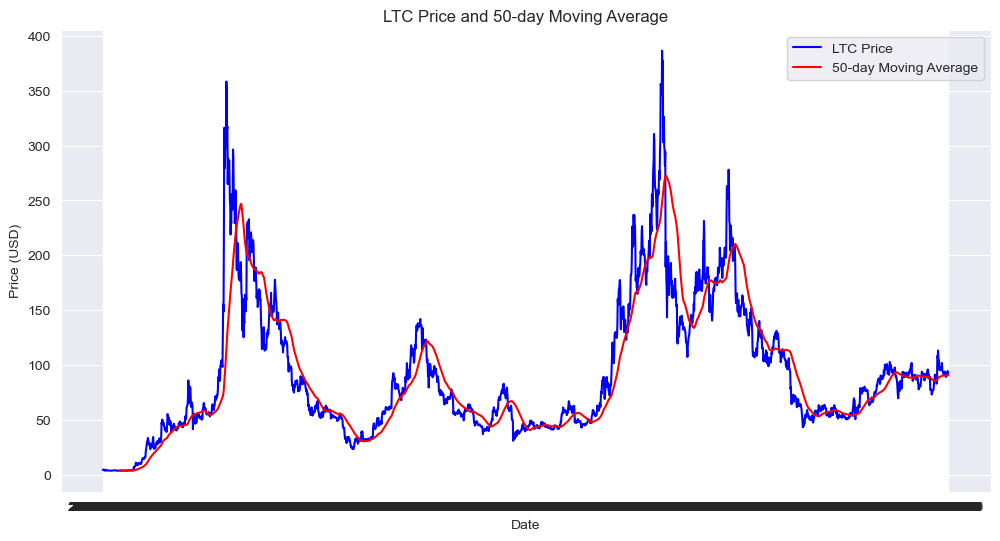

In [15]:
def display_moving_average():
    # Calculate 50-day moving average
    ltc['50-day Moving Average'] = ltc['Close'].rolling(window=50).mean()

    # Plot the closing price and the moving average
    plt.figure(figsize=(12, 6))
    plt.plot(ltc['Date'], ltc['Close'], label='LTC Price', color='blue')
    plt.plot(ltc['Date'], ltc['50-day Moving Average'], label='50-day Moving Average', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('LTC Price and 50-day Moving Average')
    plt.legend()
    plt.grid(True)
    plt.show()
display_moving_average()

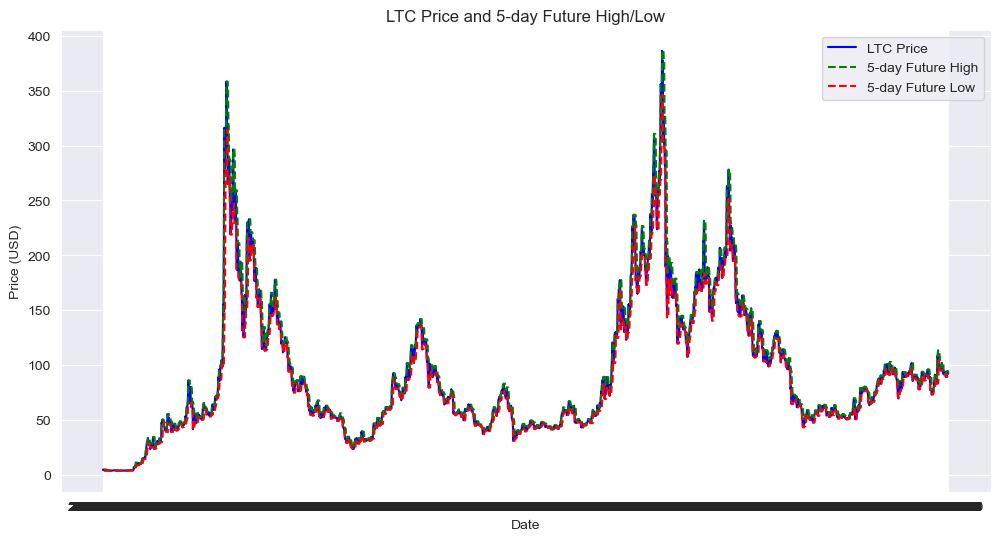

In [16]:
def display_future_high_low(future_period=5):
    # Predict future high and low lines (this is a basic example)
    ltc['Future High'] = ltc['Close'].rolling(window=future_period).max()
    ltc['Future Low'] = ltc['Close'].rolling(window=future_period).min()
    # Plot the BTC price and the future high and low lines
    plt.figure(figsize=(12, 6))
    plt.plot(ltc['Date'], ltc['Close'], label='LTC Price', color='blue')
    plt.plot(ltc['Date'], ltc['Future High'], label=f'{future_period}-day Future High', color='green', linestyle='dashed')
    plt.plot(ltc['Date'], ltc['Future Low'], label=f'{future_period}-day Future Low', color='red', linestyle='dashed')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'LTC Price and {future_period}-day Future High/Low')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Call the function to display the plot with future high and low lines for BTC
display_future_high_low(future_period=5)

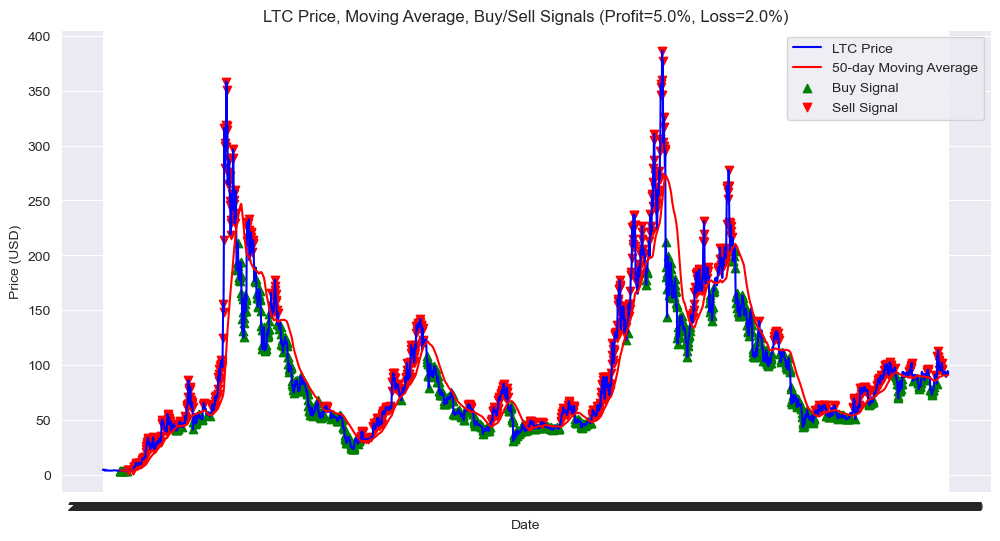

In [17]:
def display_buy_sell_points(moving_average_period=50, profit_margin=0.05, loss_margin=0.02):

    # Calculate the moving average
    ltc['Moving Average'] = ltc['Close'].rolling(window=moving_average_period).mean()
    # Calculate potential buy and sell points
    ltc['Buy Signal'] = ltc['Close'] < (1 - loss_margin) * ltc['Moving Average']
    ltc['Sell Signal'] = ltc['Close'] > (1 + profit_margin) * ltc['Moving Average']
    # Plot the BTC price, moving average, and buy/sell signals
    plt.figure(figsize=(12, 6))
    plt.plot(ltc['Date'], ltc['Close'], label='LTC Price', color='blue')
    plt.plot(ltc['Date'], ltc['Moving Average'], label=f'{moving_average_period}-day Moving Average', color='red')
    plt.scatter(ltc.loc[ltc['Buy Signal'], 'Date'], ltc.loc[ltc['Buy Signal'], 'Close'], marker='^', color='green', label='Buy Signal')
    plt.scatter(ltc.loc[ltc['Sell Signal'], 'Date'], ltc.loc[ltc['Sell Signal'], 'Close'], marker='v', color='red', label='Sell Signal')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'LTC Price, Moving Average, Buy/Sell Signals (Profit={profit_margin*100}%, Loss={loss_margin*100}%)')
    plt.legend()
    plt.grid(True)
    plt.show()

display_buy_sell_points(moving_average_period=50, profit_margin=0.05, loss_margin=0.02)


In [18]:
import yfinance as yf

def predict_market_state(cryptocurrencies):
    predictions = {}

    for crypto in cryptocurrencies:
        data = yf.download(crypto, start='2017-01-01', end='2023-08-01')
        if len(data) >= 2:
            current_price = data['Close'].iloc[-1]
            previous_price = data['Close'].iloc[-2]
            if current_price > previous_price:
                prediction = 'up'
            else:
                prediction = 'down'
            predictions[crypto] = prediction

    return predictions

cryptocurrencies = ['ETH-USD', 'XRP-USD', 'BTC-USD', 'BCH-USD', 'EOS-USD', 'ADA-USD', 'XLM-USD', 'XMR-USD', 'TRX-USD', 'LINK-USD', 'DOGE-USD'] 

predictions = predict_market_state(cryptocurrencies)

# Display the predictions
print(predictions)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'ETH-USD': 'down', 'XRP-USD': 'down', 'BTC-USD': 'down', 'BCH-USD': 'down', 'EOS-USD': 'down', 'ADA-USD': 'down', 'XLM-USD': 'down', 'XMR-USD': 'up', 'TRX-USD': 'down', 'LINK-USD': 'down', 'DOGE-USD': 'down'}


In [19]:

def add_volatility(btc, coin='LTC-USD'):
    """
    data: input data, pandas DataFrame
    coin: default is 'BTC-USD'. It could be changed as needed
    This function calculates the volatility and close_off_high of the given coin in 24 hours, 
    and adds the result as new columns to the DataFrame.
    Return: DataFrame with added columns
    """
    coin_close_columns = {
        'LTC-USD': 'Close',
    }
    if coin not in coin_close_columns:
        raise ValueError(f"Column name for {coin} close price not found.") 
    close_col = coin_close_columns[coin]
    # Calculate the price change in 24 hours (volatility)
    ltc[coin + '_volatility'] = ltc[close_col].pct_change(periods=1) * 100

    # Check if the 'High' and 'Low' columns exist for the given coin
    if 'High' in ltc.columns and 'Low' in ltc.columns:
        # Calculate the close_off_high for each day
        ltc[coin + '_close_off_high'] = 2 * ((ltc['High'] - ltc[close_col]) / 
                                              (ltc['High'] - ltc['Low'])) - 1
    else:
        # If 'High' and 'Low' columns are not present, we do not add the 'close_off_high' column
        pass
    return ltc

data_with_volatility = add_volatility(ltc, coin='LTC-USD')


In [20]:
ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2403 non-null   object 
 1   Open                    2403 non-null   float64
 2   High                    2403 non-null   float64
 3   Low                     2403 non-null   float64
 4   Close                   2403 non-null   float64
 5   Adj Close               2403 non-null   float64
 6   Volume                  2403 non-null   int64  
 7   50-day Moving Average   2354 non-null   float64
 8   Future High             2399 non-null   float64
 9   Future Low              2399 non-null   float64
 10  Moving Average          2354 non-null   float64
 11  Buy Signal              2403 non-null   bool   
 12  Sell Signal             2403 non-null   bool   
 13  LTC-USD_volatility      2402 non-null   float64
 14  LTC-USD_close_off_high  2403 non-null   

In [21]:
ltc.describe()

,Open,High,Low,Close,Adj Close,Volume,50-day Moving Average,Future High,Future Low,Moving Average,LTC-USD_volatility,LTC-USD_close_off_high
count,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2.403000e+03,2354.000000,2399.000000,2399.000000,2354.000000,2402.000000,2403.000000
mean,91.097343,94.577468,87.325137,91.111229,91.111229,1.927463e+09,91.989714,96.546582,85.958818,91.989714,0.290890,-0.043103
std,61.641497,65.011582,57.879430,61.574508,61.574508,2.291416e+09,57.761208,66.412059,56.618268,57.761208,5.844000,0.605454
min,3.714440,3.769480,3.613590,3.714530,3.714530,2.629220e+06,3.863595,3.793100,3.714530,3.863595,-36.177324,-1.000000
25%,50.349846,51.704407,48.578629,50.296400,50.296400,4.039724e+08,53.228532,52.795588,47.589336,53.228532,-2.407767,-0.599600
50%,72.196800,74.656769,69.575989,72.252800,72.252800,8.864150e+08,71.008269,76.467567,68.170303,71.008269,0.021085,-0.053069
75%,119.866833,123.813717,115.987690,119.945961,119.945961,2.791172e+09,121.732927,128.811104,114.404770,121.732927,2.605361,0.484197
max,387.869171,412.960144,345.298828,386.450775,386.450775,1.799426e+10,272.620226,386.450775,346.253571,272.620226,66.765321,1.000000


In [22]:
def create_model_data(ltc):
    """
    data: pandas DataFrame
    This function drops unnecessary columns and reverses the order of DataFrame based on descending dates.
    Return: pandas DataFrame
    """
    # Select the necessary columns for Bitcoin, Ethereum, and Apple Inc.
    coin_columns = {
        'LTC': ['Date', 'Close', 'Volume']
    }

    # Combine the selected columns for coin
    selected_columns = []
    for coin, columns in coin_columns.items():
        selected_columns.extend([coin + '_' + col for col in columns[1:]])

    # Filter the DataFrame to include only the selected columns
    ltc = ltc[coin_columns['LTC']]

    # Sort the DataFrame by 'Date' in ascending order
    ltc = ltc.sort_values(by='Date')

    # Reset the index to ensure the DataFrame index is in consecutive order
    ltc = ltc.reset_index(drop=True)

    return ltc


In [23]:
model_data = create_model_data(ltc)
model_data.head()


,Date,Close,Volume
0,2017-01-01,4.51159,11337500
1,2017-01-02,4.64894,14595300
2,2017-01-03,4.62620,10055700
3,2017-01-04,4.83785,13762400
4,2017-01-05,4.29272,19196000


In [24]:
model_data = model_data.set_index('Date')
model_data.index = pd.to_datetime(model_data.index,unit='ns')
print(model_data.index)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2023-07-22', '2023-07-23', '2023-07-24', '2023-07-25',
               '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-29',
               '2023-07-30', '2023-07-31'],
              dtype='datetime64[ns]', name='Date', length=2403, freq=None)


In [25]:
def split_data(ltc, training_size=0.8):
    """
    data: pandas DataFrame
    training_size: the proportion of data to include in the training set (default is 0.8)
    This function splits the input DataFrame into training and testing sets.
    Returns: two pandas DataFrames (train_set, test_set)
    """
    # Calculate the index where to split the data based on the training_size
    split_index = int(len(ltc) * training_size)

    # Split the data into training and testing sets
    train_set = ltc.iloc[:split_index]
    test_set = ltc.iloc[split_index:]

    return train_set, test_set

In [26]:
train_set, test_set = split_data(model_data)

In [27]:

print(train_set.shape, test_set.shape)

(1922, 2) (481, 2)


In [28]:
def create_inputs(ltc, window_len=10):
    """
    ltc: pandas DataFrame, this could be either training_set or test_set
    window_len: an integer to be used as the look back window for creating a single input sample.
    This function will create input array X from the given dataset and will normalize 'Close' and 'Volume' between 0 and 1.
    Return: X, the input for our model as a Python list, which later needs to be converted to a numpy array.
    """
    inputs = []
    for i in range(len(ltc) - window_len):
        temp_set = ltc[i:(i + window_len)].copy()
        inputs.append(temp_set)
        inputs[i]['Close'] = inputs[i]['Close'] / inputs[i]['Close'].iloc[0] - 1
        inputs[i]['Volume'] = inputs[i]['Volume'] / inputs[i]['Volume'].iloc[0] - 1
    return inputs


In [29]:
# Assuming you have a DataFrame named 'btc_data'
input_samples = create_inputs(ltc, window_len=10)


In [30]:
def create_outputs(ltc, window_len=10):
    """
    btc: pandas DataFrame, this could be either training_set or test_set
    window_len: an integer to be used as the look back window for creating a single output sample.
    This function will create output array y from the given dataset and will normalize 'Close' between 0 and 1.
    Return: y, the output for our model as a Python list, which later needs to be converted to a numpy array.
    """
    outputs = []
    for i in range(len(ltc) - window_len):
        temp_set = ltc['Close'].iloc[i + window_len] / ltc['Close'].iloc[i] - 1
        outputs.append(temp_set)
    return outputs


In [31]:
# Assuming you have a DataFrame named 'btc_data'
output_samples = create_outputs(ltc, window_len=10)
print("Output Labels for Bitcoin (LTC):")
print(output_samples)


Output Labels for Bitcoin (LTC):
[-0.14735379945441995, -0.14759064381948928, -0.15894904525891718, -0.1937472174191508, -0.08546561472020064, 0.010690819026608844, -0.004254418185260178, -0.03914802981387133, -0.10259276796901395, -0.15278192320066664, 0.01500470386418451, -0.030246273611729713, -0.014163921278922187, -0.02933708655050249, -0.05382540173589889, -0.017480897231556436, -0.021114212308961156, 0.0038429481162869372, -0.0022043440659087477, 0.03373761214914173, 0.04459713561375178, 0.06047184783607418, 0.06504833561490209, 0.07830225262458179, 0.09246663707291991, 0.05440339891597623, 0.048790454897140734, 0.04864321797099147, 0.0444095697200908, -0.05537080235052716, -0.07390453389525353, -0.06925320824010894, -0.07855049214280296, -0.08932386361711842, -0.07077377226478732, -0.05778996058083996, -0.06360029544020318, -0.051977925877494724, -0.05770078434798087, -0.009564071192857293, -0.002528346216289057, -0.002588970116122913, 0.010851729365519258, 0.03363738052185705,

In [32]:
def to_array(data):
  """
  data: DataFrame
  This function will convert list of inputs to a numpy array
  Return: numpy array
  """
  x = [np.array(data[i]) for i in range (len(data))]
  return np.array(x)

In [33]:
# Assuming you have the create_inputs, create_outputs, and to_array functions defined

# Create input samples and output labels for the training set
X_train = create_inputs(train_set)
Y_train = create_outputs(train_set)

# Create input samples and output labels for the test set
X_test = create_inputs(test_set)
Y_test = create_outputs(test_set)

# Convert the lists of input samples to numpy arrays
x_train, x_test = to_array(X_train), to_array(X_test)


In [34]:

print(x_train.shape)
print(x_test.shape)

(1912, 10, 2)
(471, 10, 2)


In [35]:
train_data = model_data.iloc[200:]
test_data = model_data.iloc[:200]

In [36]:
window_len = 10

# Create input samples for the training set
train_inputs = create_inputs(train_data, window_len)

# Create input samples for the test set
test_inputs = create_inputs(test_data, window_len)

In [37]:
print(train_data.shape)
print(test_data.shape)

(2203, 2)
(200, 2)


In [38]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] - 1

def normalise_min_max(continuous):
    return (continuous - continuous.min()) / (model_data.max() - continuous.min())

In [39]:

aim = 'Close'


In [40]:
def extract_window_data(continuous, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(continuous) - window_len):
        tmp = continuous[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [41]:
import matplotlib.pyplot as plt

def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('BTC-USD', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    plt.show()


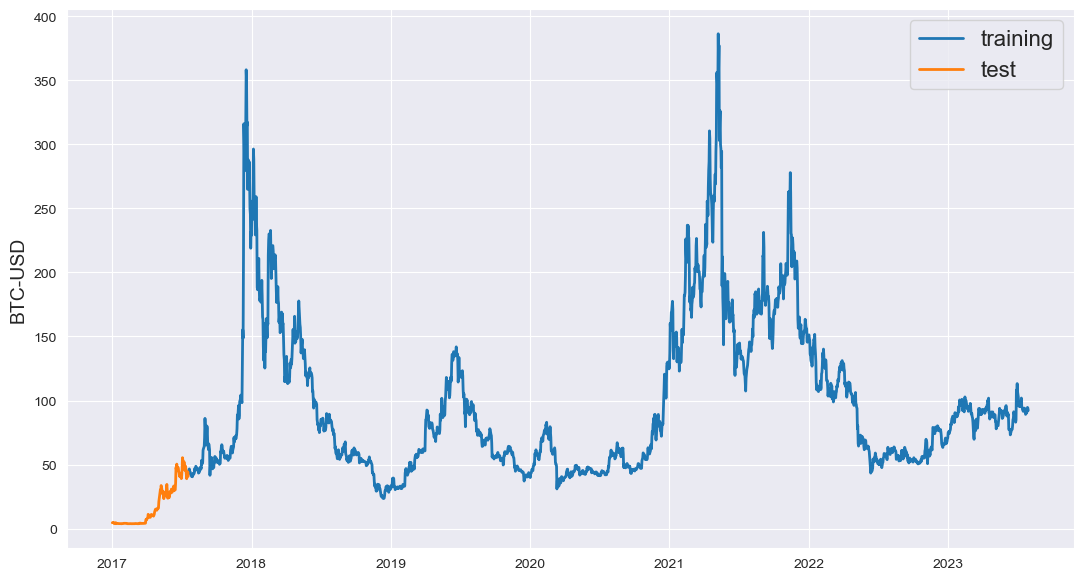

In [42]:
line_plot(train_data[aim], test_data[aim], 'training', 'test', title='')

In [43]:
def prepare_data(continuous, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

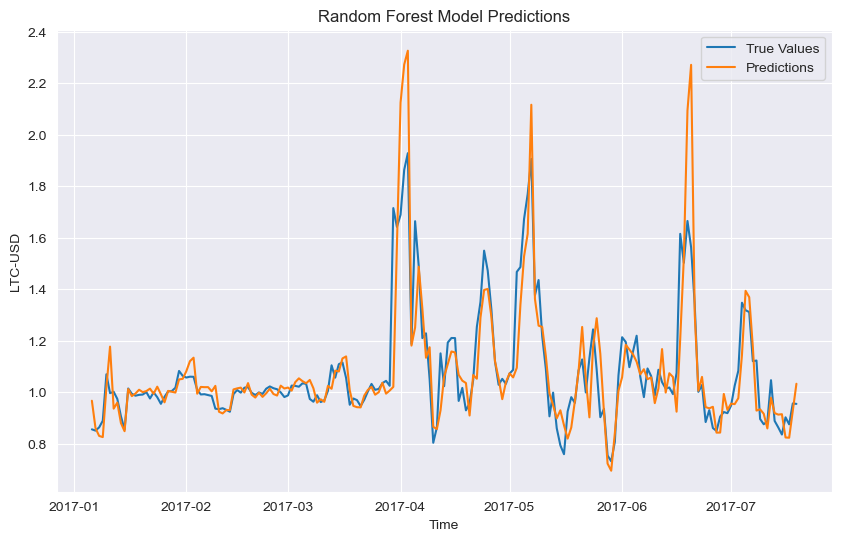

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Assuming you have the prepare_data function and model_data, aim variables already defined

# Set the random seed for reproducibility
np.random.seed(245)

# Set hyperparameters
window_len = 5
test_size = 0.2
zero_base = True

# Prepare the data using the prepare_data function (assuming model_data and aim are defined)
train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
    model_data, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)

# Reshape the input data to be 2D for RandomForestRegressor
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Invert the scaling if necessary
if zero_base:
    y_test = y_test + 1
    y_pred = y_pred + 1

# Save the model to a file
model_filename = 'ltc_rf_model.joblib'
joblib.dump(model, model_filename)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[window_len:], y_test, label='True Values')
plt.plot(test_data.index[window_len:], y_pred, label='Predictions')
plt.xlabel('Time')
plt.ylabel('LTC-USD')
plt.title('Random Forest Model Predictions')
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²) Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0163
Mean Absolute Error (MAE): 0.0712
Mean Absolute Percentage Error (MAPE): 5.92%
R-squared (R²) Score: 0.6615
